# Загрузка и предобработка данных

In [271]:
import pandas as pd
import numpy as np

In [272]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.
"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [273]:
data = pd.read_csv('./train.csv')

In [274]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [275]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [276]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [277]:
for num_col in num_cols:
    print(data[num_col].dtypes)

int64
float64
object


In [278]:
data[data['TotalSpent'] == '?'].shape

(0, 20)

In [279]:
data[data['TotalSpent'] == ' '].shape

(9, 20)

In [280]:
data = data.replace(' ', np.nan)
data = data.dropna()
data.shape

(5273, 20)

In [281]:
data['TotalSpent'] = data['TotalSpent'].astype('float64')

# Анализ данных

In [282]:
from matplotlib import pyplot as plt
import seaborn as sns

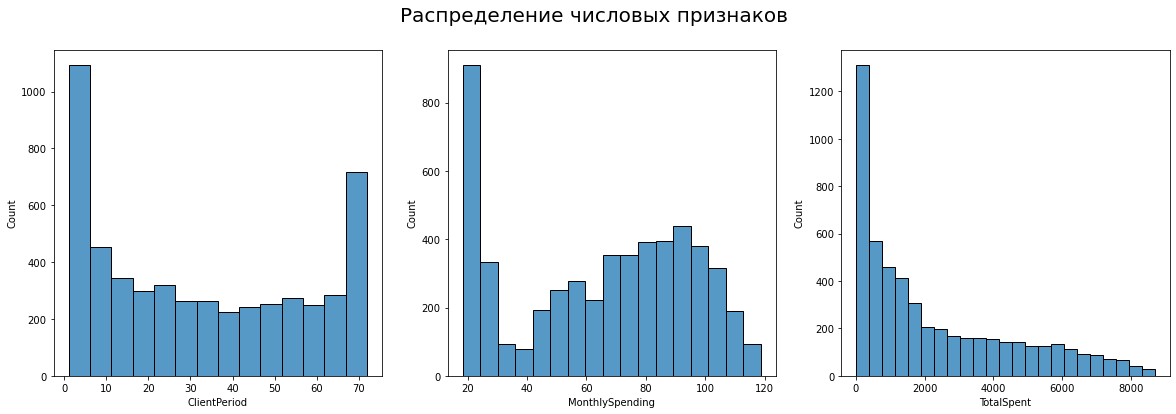

In [283]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))
fig.suptitle('Распределение числовых признаков', fontsize=(20))  
for index, axis in enumerate(axes):
    sns.histplot(data=data[num_cols[index]], ax=axis)

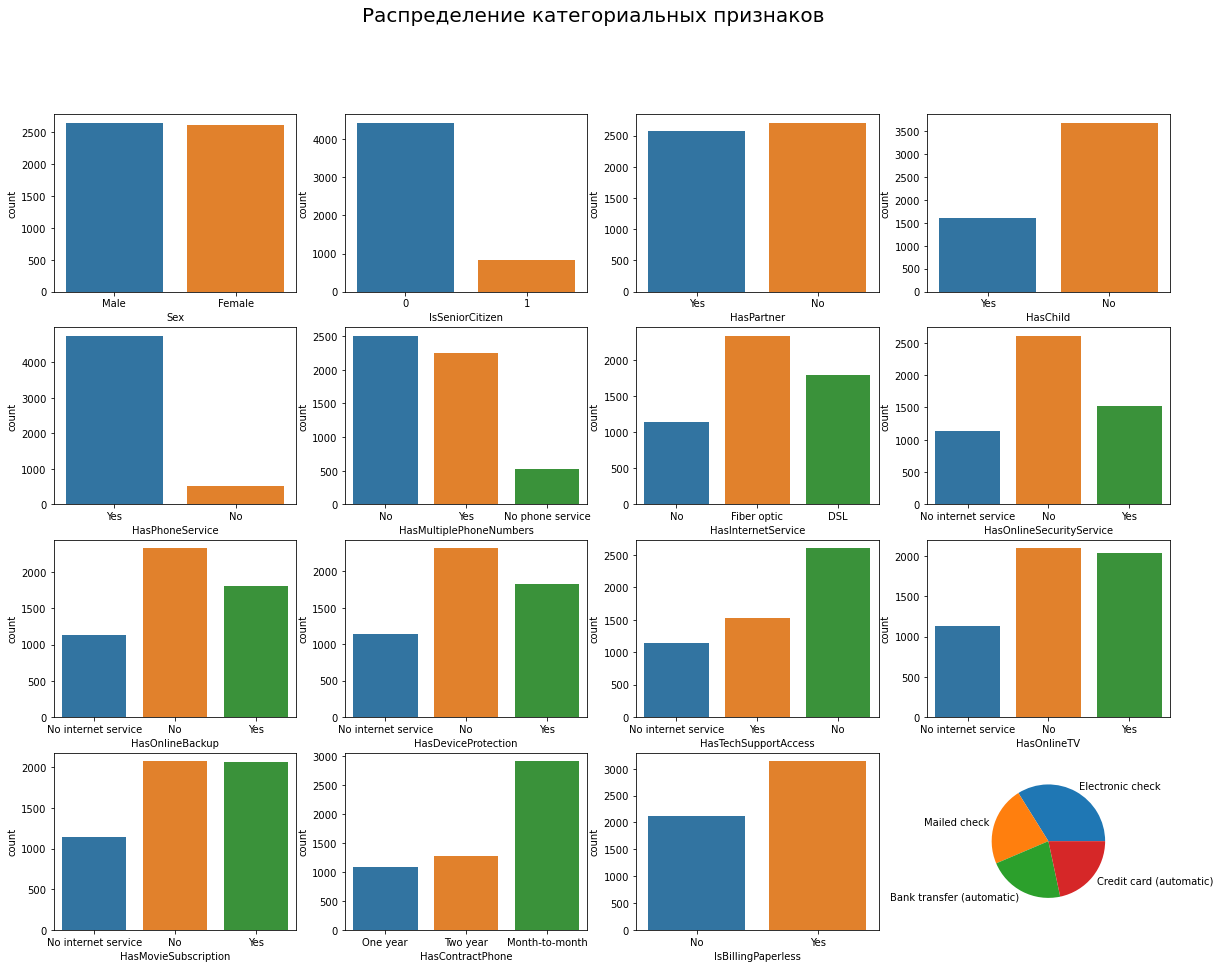

In [284]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
fig.suptitle('Распределение категориальных признаков', fontsize=(20)) 
for row_index, axis_row in enumerate(axes):
    for ax_index, axis in enumerate(axis_row):
        index = ax_index + 4 * row_index
        if index != 15:
            sns.countplot(data=data, x=cat_cols[index], ax=axis)
        else:
            plt.pie(data[cat_cols[index]].value_counts(), labels=list(data[cat_cols[-1]].value_counts().to_dict()), radius=0.8)

([<matplotlib.patches.Wedge at 0x2417b61ac10>,
 [Text(-1.1540821614246177, 1.248236501902377, '0'),
  Text(1.1540821614246175, -1.2482365019023773, '1')])

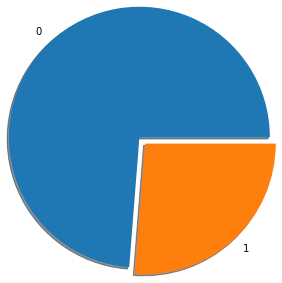

In [285]:
plt.pie(data[target_col].value_counts(), labels=[0, 1], explode=[0.05, 0.05], shadow=True, radius=1.5)

In [286]:
data[target_col].value_counts()

0    3889
1    1384
Name: Churn, dtype: int64

# Применение линейных моделей

In [287]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [288]:
dummy_features = pd.get_dummies(data[cat_cols])
X = pd.concat([data[num_cols], dummy_features], axis = 1)
X_origin = data.iloc[:, :-1]
y = data.iloc[:, -1]
X

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.50,1026.35,0,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,1
1,72,25.85,1872.20,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,1,0,0
2,1,75.90,75.90,0,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
3,32,79.30,2570.00,1,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,1
4,60,115.25,6758.45,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
5278,50,44.45,2188.45,0,0,1,0,1,1,0,...,0,0,1,0,0,1,1,0,0,0
5279,1,55.05,55.05,0,0,1,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
5280,29,76.00,2215.25,0,1,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0


In [289]:
log_model = make_pipeline(StandardScaler(), LogisticRegressionCV(cv=5, scoring='roc_auc', n_jobs=-1, verbose=10))

In [290]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, train_size=0.8, random_state=42)

In [291]:
log_model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.0s remaining:    3.1s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.1s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.5s finished


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregressioncv',
                 LogisticRegressionCV(cv=5, n_jobs=-1, scoring='roc_auc',
                                      verbose=10))])

In [292]:
y_train_predicted = log_model.predict_proba(X_train)[:, 1]
y_test_predicted = log_model.predict_proba(X_test)[:, 1]

In [293]:
from sklearn.metrics import roc_auc_score, roc_curve

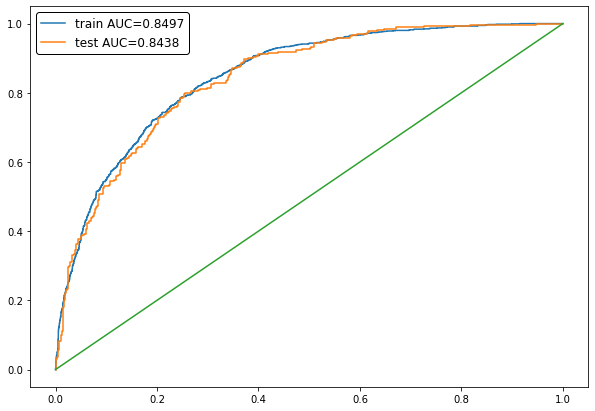

In [294]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [295]:
print(f'Качество: {test_auc:.4f}')
print(f'Оптимальный параметр С: {log_model[-1].C_[0]:.2f}')

Качество: 0.8438
Оптимальный параметр С: 21.54


# Применение градиентного бустинга

In [296]:
from catboost import CatBoostClassifier

In [297]:
X_train_origin, X_test_origin, y_train, y_test = train_test_split(X_origin.values, y.values, train_size=0.8, random_state=42)

In [298]:
cat_cols_indices = [i for i in range(3, 19)]
boost_clf = CatBoostClassifier(cat_features=cat_cols_indices)
boost_clf.fit(X_train_origin, y_train)

Learning rate set to 0.019048
0:	learn: 0.6801499	total: 46.1ms	remaining: 46s
1:	learn: 0.6683861	total: 93.7ms	remaining: 46.8s
2:	learn: 0.6574055	total: 136ms	remaining: 45.3s
3:	learn: 0.6459140	total: 186ms	remaining: 46.3s
4:	learn: 0.6353605	total: 234ms	remaining: 46.5s
5:	learn: 0.6261610	total: 272ms	remaining: 45.1s
6:	learn: 0.6167841	total: 315ms	remaining: 44.8s
7:	learn: 0.6080311	total: 360ms	remaining: 44.6s
8:	learn: 0.5997483	total: 406ms	remaining: 44.7s
9:	learn: 0.5918432	total: 453ms	remaining: 44.8s
10:	learn: 0.5839242	total: 500ms	remaining: 45s
11:	learn: 0.5766678	total: 544ms	remaining: 44.8s
12:	learn: 0.5701751	total: 575ms	remaining: 43.6s
13:	learn: 0.5631203	total: 621ms	remaining: 43.7s
14:	learn: 0.5566815	total: 665ms	remaining: 43.7s
15:	learn: 0.5507060	total: 710ms	remaining: 43.7s
16:	learn: 0.5449043	total: 758ms	remaining: 43.8s
17:	learn: 0.5390888	total: 802ms	remaining: 43.7s
18:	learn: 0.5338561	total: 848ms	remaining: 43.8s
19:	learn: 0.

163:	learn: 0.3951401	total: 7.18s	remaining: 36.6s
164:	learn: 0.3949517	total: 7.23s	remaining: 36.6s
165:	learn: 0.3948067	total: 7.28s	remaining: 36.6s
166:	learn: 0.3946294	total: 7.33s	remaining: 36.5s
167:	learn: 0.3946068	total: 7.34s	remaining: 36.4s
168:	learn: 0.3944551	total: 7.39s	remaining: 36.3s
169:	learn: 0.3943255	total: 7.43s	remaining: 36.3s
170:	learn: 0.3942594	total: 7.46s	remaining: 36.2s
171:	learn: 0.3939716	total: 7.51s	remaining: 36.2s
172:	learn: 0.3936969	total: 7.56s	remaining: 36.1s
173:	learn: 0.3934543	total: 7.61s	remaining: 36.1s
174:	learn: 0.3932836	total: 7.65s	remaining: 36.1s
175:	learn: 0.3932141	total: 7.67s	remaining: 35.9s
176:	learn: 0.3930316	total: 7.72s	remaining: 35.9s
177:	learn: 0.3929754	total: 7.74s	remaining: 35.7s
178:	learn: 0.3929365	total: 7.76s	remaining: 35.6s
179:	learn: 0.3927081	total: 7.81s	remaining: 35.6s
180:	learn: 0.3925964	total: 7.86s	remaining: 35.6s
181:	learn: 0.3924062	total: 7.91s	remaining: 35.6s
182:	learn: 

324:	learn: 0.3788386	total: 13.8s	remaining: 28.7s
325:	learn: 0.3786201	total: 13.9s	remaining: 28.6s
326:	learn: 0.3786201	total: 13.9s	remaining: 28.5s
327:	learn: 0.3785585	total: 13.9s	remaining: 28.5s
328:	learn: 0.3784868	total: 14s	remaining: 28.5s
329:	learn: 0.3784859	total: 14s	remaining: 28.4s
330:	learn: 0.3784122	total: 14s	remaining: 28.3s
331:	learn: 0.3784045	total: 14s	remaining: 28.2s
332:	learn: 0.3782014	total: 14.1s	remaining: 28.2s
333:	learn: 0.3781965	total: 14.1s	remaining: 28.1s
334:	learn: 0.3780933	total: 14.2s	remaining: 28.1s
335:	learn: 0.3780705	total: 14.2s	remaining: 28.1s
336:	learn: 0.3780554	total: 14.2s	remaining: 28s
337:	learn: 0.3779326	total: 14.3s	remaining: 28s
338:	learn: 0.3777143	total: 14.3s	remaining: 28s
339:	learn: 0.3775942	total: 14.4s	remaining: 27.9s
340:	learn: 0.3775776	total: 14.4s	remaining: 27.9s
341:	learn: 0.3774894	total: 14.5s	remaining: 27.9s
342:	learn: 0.3774287	total: 14.5s	remaining: 27.8s
343:	learn: 0.3774178	tota

484:	learn: 0.3654980	total: 20.8s	remaining: 22.1s
485:	learn: 0.3653860	total: 20.9s	remaining: 22.1s
486:	learn: 0.3653087	total: 20.9s	remaining: 22.1s
487:	learn: 0.3651112	total: 21s	remaining: 22s
488:	learn: 0.3650358	total: 21s	remaining: 22s
489:	learn: 0.3649433	total: 21.1s	remaining: 21.9s
490:	learn: 0.3648812	total: 21.1s	remaining: 21.9s
491:	learn: 0.3648165	total: 21.2s	remaining: 21.9s
492:	learn: 0.3647715	total: 21.2s	remaining: 21.8s
493:	learn: 0.3646657	total: 21.3s	remaining: 21.8s
494:	learn: 0.3645388	total: 21.3s	remaining: 21.7s
495:	learn: 0.3644617	total: 21.4s	remaining: 21.7s
496:	learn: 0.3644029	total: 21.4s	remaining: 21.7s
497:	learn: 0.3643465	total: 21.5s	remaining: 21.6s
498:	learn: 0.3642621	total: 21.5s	remaining: 21.6s
499:	learn: 0.3642032	total: 21.5s	remaining: 21.5s
500:	learn: 0.3640569	total: 21.6s	remaining: 21.5s
501:	learn: 0.3639203	total: 21.6s	remaining: 21.5s
502:	learn: 0.3638126	total: 21.7s	remaining: 21.4s
503:	learn: 0.363754

645:	learn: 0.3490427	total: 28.5s	remaining: 15.6s
646:	learn: 0.3489004	total: 28.6s	remaining: 15.6s
647:	learn: 0.3488321	total: 28.6s	remaining: 15.5s
648:	learn: 0.3487439	total: 28.7s	remaining: 15.5s
649:	learn: 0.3486217	total: 28.7s	remaining: 15.5s
650:	learn: 0.3485563	total: 28.8s	remaining: 15.4s
651:	learn: 0.3483566	total: 28.8s	remaining: 15.4s
652:	learn: 0.3481104	total: 28.9s	remaining: 15.3s
653:	learn: 0.3480579	total: 28.9s	remaining: 15.3s
654:	learn: 0.3479928	total: 28.9s	remaining: 15.2s
655:	learn: 0.3478658	total: 29s	remaining: 15.2s
656:	learn: 0.3477812	total: 29s	remaining: 15.2s
657:	learn: 0.3476758	total: 29.1s	remaining: 15.1s
658:	learn: 0.3475314	total: 29.1s	remaining: 15.1s
659:	learn: 0.3474764	total: 29.2s	remaining: 15s
660:	learn: 0.3473185	total: 29.2s	remaining: 15s
661:	learn: 0.3472765	total: 29.3s	remaining: 15s
662:	learn: 0.3471793	total: 29.3s	remaining: 14.9s
663:	learn: 0.3470861	total: 29.4s	remaining: 14.9s
664:	learn: 0.3470482	

807:	learn: 0.3347491	total: 36.3s	remaining: 8.63s
808:	learn: 0.3346838	total: 36.4s	remaining: 8.59s
809:	learn: 0.3346298	total: 36.4s	remaining: 8.54s
810:	learn: 0.3345146	total: 36.5s	remaining: 8.5s
811:	learn: 0.3343589	total: 36.5s	remaining: 8.46s
812:	learn: 0.3342499	total: 36.6s	remaining: 8.41s
813:	learn: 0.3341817	total: 36.6s	remaining: 8.37s
814:	learn: 0.3340475	total: 36.7s	remaining: 8.32s
815:	learn: 0.3339547	total: 36.7s	remaining: 8.28s
816:	learn: 0.3338621	total: 36.8s	remaining: 8.23s
817:	learn: 0.3338083	total: 36.8s	remaining: 8.19s
818:	learn: 0.3337219	total: 36.9s	remaining: 8.14s
819:	learn: 0.3336145	total: 36.9s	remaining: 8.1s
820:	learn: 0.3334712	total: 37s	remaining: 8.06s
821:	learn: 0.3334206	total: 37s	remaining: 8.01s
822:	learn: 0.3332346	total: 37s	remaining: 7.97s
823:	learn: 0.3330774	total: 37.1s	remaining: 7.92s
824:	learn: 0.3330364	total: 37.1s	remaining: 7.88s
825:	learn: 0.3329981	total: 37.2s	remaining: 7.83s
826:	learn: 0.332946

967:	learn: 0.3226317	total: 43.9s	remaining: 1.45s
968:	learn: 0.3224459	total: 43.9s	remaining: 1.41s
969:	learn: 0.3223674	total: 44s	remaining: 1.36s
970:	learn: 0.3223229	total: 44s	remaining: 1.31s
971:	learn: 0.3222928	total: 44.1s	remaining: 1.27s
972:	learn: 0.3222494	total: 44.1s	remaining: 1.22s
973:	learn: 0.3221743	total: 44.2s	remaining: 1.18s
974:	learn: 0.3221029	total: 44.2s	remaining: 1.13s
975:	learn: 0.3220759	total: 44.3s	remaining: 1.09s
976:	learn: 0.3219661	total: 44.3s	remaining: 1.04s
977:	learn: 0.3219259	total: 44.3s	remaining: 998ms
978:	learn: 0.3218748	total: 44.4s	remaining: 952ms
979:	learn: 0.3218395	total: 44.4s	remaining: 907ms
980:	learn: 0.3218047	total: 44.5s	remaining: 862ms
981:	learn: 0.3217654	total: 44.5s	remaining: 816ms
982:	learn: 0.3216854	total: 44.6s	remaining: 771ms
983:	learn: 0.3216182	total: 44.6s	remaining: 726ms
984:	learn: 0.3215669	total: 44.7s	remaining: 680ms
985:	learn: 0.3215282	total: 44.7s	remaining: 635ms
986:	learn: 0.32

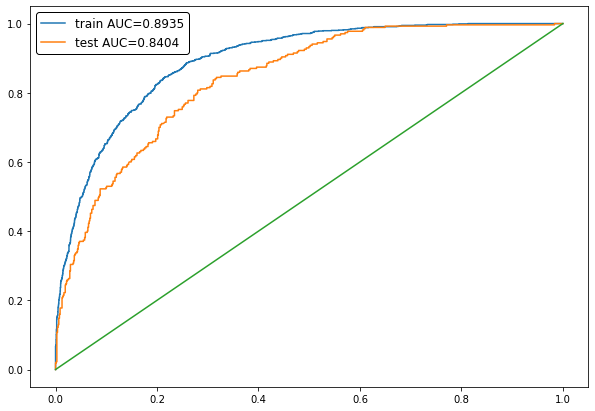

In [299]:
y_train_predicted = boost_clf.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boost_clf.predict_proba(X_test_origin)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [300]:
print(f'Качество: {test_auc:.4f}')

Качество: 0.8404


In [301]:
cat_cols_indices = [i for i in range(3, 19)]
boost_clf_1 = CatBoostClassifier(cat_features=cat_cols_indices, eval_metric='AUC', depth=4)
boost_clf_1.fit(X_train_origin, y_train)

Learning rate set to 0.019048
0:	total: 28.1ms	remaining: 28.1s
1:	total: 61.5ms	remaining: 30.7s
2:	total: 96.4ms	remaining: 32s
3:	total: 130ms	remaining: 32.3s
4:	total: 147ms	remaining: 29.3s
5:	total: 180ms	remaining: 29.7s
6:	total: 211ms	remaining: 29.9s
7:	total: 233ms	remaining: 28.9s
8:	total: 263ms	remaining: 28.9s
9:	total: 290ms	remaining: 28.7s
10:	total: 321ms	remaining: 28.9s
11:	total: 351ms	remaining: 28.9s
12:	total: 380ms	remaining: 28.9s
13:	total: 412ms	remaining: 29s
14:	total: 443ms	remaining: 29.1s
15:	total: 473ms	remaining: 29.1s
16:	total: 495ms	remaining: 28.6s
17:	total: 526ms	remaining: 28.7s
18:	total: 556ms	remaining: 28.7s
19:	total: 583ms	remaining: 28.6s
20:	total: 612ms	remaining: 28.5s
21:	total: 641ms	remaining: 28.5s
22:	total: 672ms	remaining: 28.6s
23:	total: 701ms	remaining: 28.5s
24:	total: 730ms	remaining: 28.5s
25:	total: 758ms	remaining: 28.4s
26:	total: 788ms	remaining: 28.4s
27:	total: 817ms	remaining: 28.4s
28:	total: 846ms	remaining: 2

240:	total: 7.14s	remaining: 22.5s
241:	total: 7.17s	remaining: 22.5s
242:	total: 7.19s	remaining: 22.4s
243:	total: 7.21s	remaining: 22.4s
244:	total: 7.24s	remaining: 22.3s
245:	total: 7.27s	remaining: 22.3s
246:	total: 7.29s	remaining: 22.2s
247:	total: 7.33s	remaining: 22.2s
248:	total: 7.34s	remaining: 22.1s
249:	total: 7.37s	remaining: 22.1s
250:	total: 7.4s	remaining: 22.1s
251:	total: 7.43s	remaining: 22.1s
252:	total: 7.46s	remaining: 22s
253:	total: 7.49s	remaining: 22s
254:	total: 7.52s	remaining: 22s
255:	total: 7.55s	remaining: 21.9s
256:	total: 7.58s	remaining: 21.9s
257:	total: 7.61s	remaining: 21.9s
258:	total: 7.64s	remaining: 21.9s
259:	total: 7.67s	remaining: 21.8s
260:	total: 7.7s	remaining: 21.8s
261:	total: 7.73s	remaining: 21.8s
262:	total: 7.76s	remaining: 21.7s
263:	total: 7.79s	remaining: 21.7s
264:	total: 7.82s	remaining: 21.7s
265:	total: 7.85s	remaining: 21.7s
266:	total: 7.88s	remaining: 21.6s
267:	total: 7.9s	remaining: 21.6s
268:	total: 7.93s	remaining: 

477:	total: 14.2s	remaining: 15.5s
478:	total: 14.2s	remaining: 15.5s
479:	total: 14.2s	remaining: 15.4s
480:	total: 14.3s	remaining: 15.4s
481:	total: 14.3s	remaining: 15.4s
482:	total: 14.3s	remaining: 15.3s
483:	total: 14.4s	remaining: 15.3s
484:	total: 14.4s	remaining: 15.3s
485:	total: 14.4s	remaining: 15.2s
486:	total: 14.4s	remaining: 15.2s
487:	total: 14.5s	remaining: 15.2s
488:	total: 14.5s	remaining: 15.2s
489:	total: 14.5s	remaining: 15.1s
490:	total: 14.6s	remaining: 15.1s
491:	total: 14.6s	remaining: 15.1s
492:	total: 14.6s	remaining: 15s
493:	total: 14.7s	remaining: 15s
494:	total: 14.7s	remaining: 15s
495:	total: 14.7s	remaining: 15s
496:	total: 14.7s	remaining: 14.9s
497:	total: 14.8s	remaining: 14.9s
498:	total: 14.8s	remaining: 14.9s
499:	total: 14.8s	remaining: 14.8s
500:	total: 14.9s	remaining: 14.8s
501:	total: 14.9s	remaining: 14.8s
502:	total: 14.9s	remaining: 14.8s
503:	total: 15s	remaining: 14.7s
504:	total: 15s	remaining: 14.7s
505:	total: 15s	remaining: 14.7s

716:	total: 21.6s	remaining: 8.51s
717:	total: 21.6s	remaining: 8.48s
718:	total: 21.6s	remaining: 8.45s
719:	total: 21.7s	remaining: 8.42s
720:	total: 21.7s	remaining: 8.39s
721:	total: 21.7s	remaining: 8.36s
722:	total: 21.8s	remaining: 8.33s
723:	total: 21.8s	remaining: 8.3s
724:	total: 21.8s	remaining: 8.27s
725:	total: 21.8s	remaining: 8.24s
726:	total: 21.9s	remaining: 8.21s
727:	total: 21.9s	remaining: 8.18s
728:	total: 21.9s	remaining: 8.15s
729:	total: 22s	remaining: 8.12s
730:	total: 22s	remaining: 8.09s
731:	total: 22s	remaining: 8.06s
732:	total: 22.1s	remaining: 8.03s
733:	total: 22.1s	remaining: 8s
734:	total: 22.1s	remaining: 7.97s
735:	total: 22.1s	remaining: 7.94s
736:	total: 22.2s	remaining: 7.91s
737:	total: 22.2s	remaining: 7.88s
738:	total: 22.2s	remaining: 7.85s
739:	total: 22.3s	remaining: 7.82s
740:	total: 22.3s	remaining: 7.79s
741:	total: 22.3s	remaining: 7.76s
742:	total: 22.4s	remaining: 7.74s
743:	total: 22.4s	remaining: 7.71s
744:	total: 22.4s	remaining: 7

954:	total: 29s	remaining: 1.36s
955:	total: 29s	remaining: 1.33s
956:	total: 29s	remaining: 1.3s
957:	total: 29.1s	remaining: 1.27s
958:	total: 29.1s	remaining: 1.24s
959:	total: 29.1s	remaining: 1.21s
960:	total: 29.2s	remaining: 1.18s
961:	total: 29.2s	remaining: 1.15s
962:	total: 29.2s	remaining: 1.12s
963:	total: 29.2s	remaining: 1.09s
964:	total: 29.3s	remaining: 1.06s
965:	total: 29.3s	remaining: 1.03s
966:	total: 29.3s	remaining: 1s
967:	total: 29.4s	remaining: 971ms
968:	total: 29.4s	remaining: 940ms
969:	total: 29.4s	remaining: 910ms
970:	total: 29.5s	remaining: 880ms
971:	total: 29.5s	remaining: 849ms
972:	total: 29.5s	remaining: 819ms
973:	total: 29.5s	remaining: 789ms
974:	total: 29.6s	remaining: 758ms
975:	total: 29.6s	remaining: 728ms
976:	total: 29.6s	remaining: 698ms
977:	total: 29.7s	remaining: 667ms
978:	total: 29.7s	remaining: 637ms
979:	total: 29.7s	remaining: 607ms
980:	total: 29.8s	remaining: 576ms
981:	total: 29.8s	remaining: 546ms
982:	total: 29.8s	remaining: 5

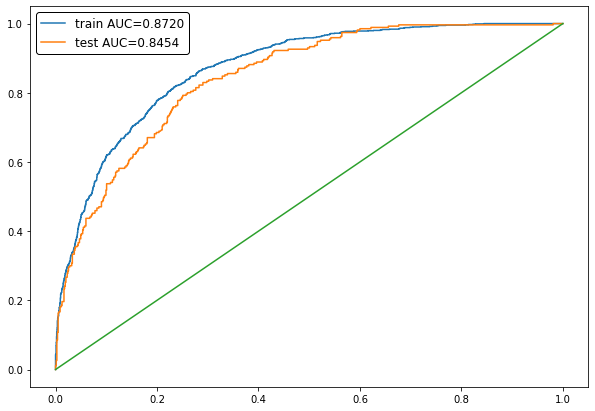

In [302]:
y_train_predicted = boost_clf_1.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boost_clf_1.predict_proba(X_test_origin)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [303]:
cat_cols_indices = [i for i in range(3, 19)]
boost_clf_2 = CatBoostClassifier(cat_features=cat_cols_indices, eval_metric='AUC', n_estimators=200, depth=3, learning_rate=0.08)
boost_clf_2.fit(X_train_origin, y_train)

0:	total: 23.2ms	remaining: 4.62s
1:	total: 48.7ms	remaining: 4.82s
2:	total: 74.1ms	remaining: 4.86s
3:	total: 99.9ms	remaining: 4.9s
4:	total: 120ms	remaining: 4.7s
5:	total: 146ms	remaining: 4.71s
6:	total: 169ms	remaining: 4.65s
7:	total: 192ms	remaining: 4.6s
8:	total: 213ms	remaining: 4.52s
9:	total: 238ms	remaining: 4.51s
10:	total: 262ms	remaining: 4.49s
11:	total: 288ms	remaining: 4.51s
12:	total: 312ms	remaining: 4.49s
13:	total: 335ms	remaining: 4.45s
14:	total: 357ms	remaining: 4.41s
15:	total: 381ms	remaining: 4.38s
16:	total: 402ms	remaining: 4.33s
17:	total: 424ms	remaining: 4.28s
18:	total: 446ms	remaining: 4.25s
19:	total: 468ms	remaining: 4.21s
20:	total: 490ms	remaining: 4.18s
21:	total: 514ms	remaining: 4.16s
22:	total: 537ms	remaining: 4.13s
23:	total: 559ms	remaining: 4.1s
24:	total: 581ms	remaining: 4.06s
25:	total: 601ms	remaining: 4.02s
26:	total: 624ms	remaining: 4s
27:	total: 647ms	remaining: 3.97s
28:	total: 670ms	remaining: 3.95s
29:	total: 692ms	remaining:

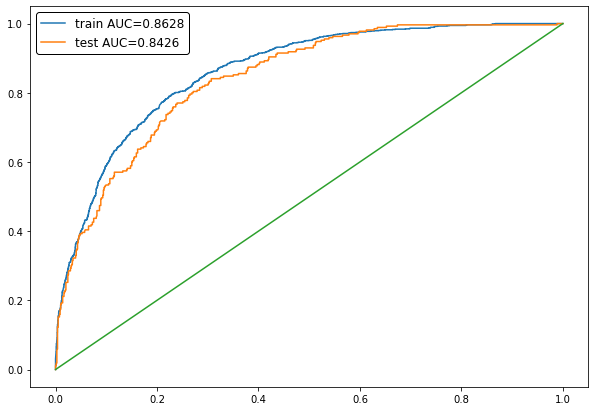

In [304]:
y_train_predicted = boost_clf_2.predict_proba(X_train_origin)[:, 1]
y_test_predicted = boost_clf_2.predict_proba(X_test_origin)[:, 1]
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [305]:
best_model = boost_clf_1
y_test_predicted = boost_clf_1.predict_proba(X_test_origin)[:, 1]
test_auc = roc_auc_score(y_test, y_test_predicted)
best_score = test_auc

In [306]:
print(f'Наилучшее достигнутое качество - {best_score:.2f}')

Наилучшее достигнутое качество - 0.85
